## Exercise in Photogrammetry II
# Ex. 06 Orthophoto
### Submission: 29.01.2021 
### Points: 12


In this exercise you need to construct the orthophoto given a regular, tilted image. 
We provide you the image `image.rect.jpg` as well as orientation data in form of projection matrix P in the file `P.mat` and Digital Surface Model (DSM) in file `Z.mat`. 
The image coordinate system is a left handed system with the origin in the upper left corner of the image.

The DSM is given as matrix where for every point $(x, y)$ corresponds to the value of the height z. The origin of the object coordinate system lies in the left bottom corner. 
The distance in point space corresponds to the grid of $1\times1 \,mm$ in object space. The x-axis increases to the right.

1. Read in the data (image,DSM,P) and *visualize* the DSM model (e.g. `plot_surface(...)`) and the image. Label the axes of both plots. (1 Point)
2. Create the orthophoto from the given image and Digital Surface Model.
We neglect the interpolation of orthophoto points in DSM and creating the orthophoto of the same dimensions as DSM so that every point of the DSM corresponds to the pixel in the orthophoto. 
For every point $(X,Y)$ of the orthophoto perform the following steps (6 Points):
    - Get the height z, so that the point in the object space is $X=[x,y,z,1]^T$
    - Compute the image pixel in the given image by projecting $X$ through $P$
    - Estimate the color of the pixel in the orthophoto (nearest neighbor).
3. Visualize the orthophoto next to the input image. Make sure that both images are in a lefthanded image coordinate system. (1 Point)
4. {Text} Which errors typically occur in orthophotos? Provide for each error a brief explanation and an example from the orthophoto of task 3. (4 Points)

**WARNING:** Be aware that the coordinates of the DSM are coordinates in the right handed system, where the origin lies in the lower left corner.

## 1. Read data (image, DSM, P) and visualize DSM model, image

In [12]:
# Import libraries

import scipy.io 
import matplotlib.pyplot as plt
from matplotlib import cm
import imageio
import numpy as np

%matplotlib inline

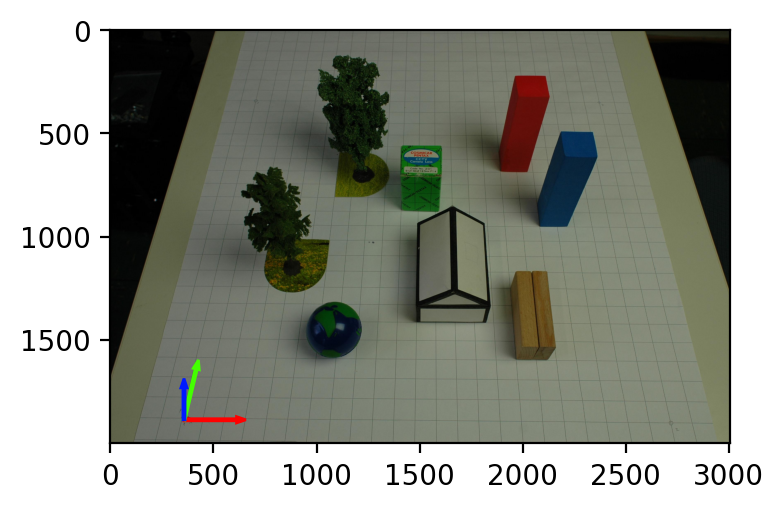

In [57]:
# Read and display image
# X in red, Y in green, Z is is blue 

img = imageio.imread('./data/image.rect.jpg')

fig = plt.figure(figsize=(4, 4), dpi=200)
plt.arrow(357, 1889, 300, 0, shape='full', lw=1, length_includes_head=True, width=10, color='red', label='x')
plt.arrow(357, 1889, 70, -290, shape='full', lw=1, length_includes_head=True, width=10, color='#44ff00', label='x')
plt.arrow(357, 1889, 0, -200, shape='full', lw=1, length_includes_head=True, width=10, color='#001aff', label='x')

plt.imshow(img)

In [6]:
# Read and display DSM Model

DSM = scipy.io.loadmat('./data/Z.mat')

In [9]:
Z = DSM['Z']

In [31]:
print(Z.shape)

(517, 577)


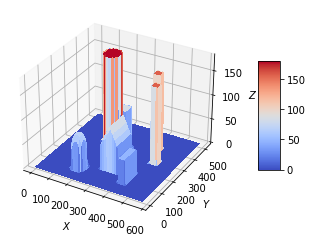

In [64]:
# See: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
# See: https://stackoverflow.com/questions/37711538/matplotlib-3d-axes-ticks-labels-and-latex
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

X = np.arange(0, 577, 1)  # X max is 576
Y = np.arange(0, 517, 1)  # Y max is 516
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) 

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$X$', fontsize=10)
ax.set_ylabel('$Y$', fontsize=10)
ax.set_zlabel('$Z$', fontsize=10)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1)
plt.show()

In [68]:
# Read the Projection Matrix P 

P = scipy.io.loadmat('./data/P.mat')['P']

In [69]:
print(P)

[[ 3.53780723e+01 -1.69989325e+03 -2.14913413e+03  1.17542619e+06]
 [ 2.55508912e+03  7.82769151e+02 -1.27690023e+03  2.19836758e+05]
 [ 2.59547158e-03  5.03848409e-01 -8.63788194e-01  6.25199896e+02]]


## 2. Create the orthophoto from the given image and Digital Surface Model

We neglect the interpolation of orthophoto points in DSM and creating the orthophoto of the same dimensions as DSM so that every point of the DSM corresponds to the pixel in the orthophoto. (This mean the orthophoto, raw image, and DSM has the same size. In real world, this can not happen). With this assumption, we can drop the DSM Interpolation  by using Bilinear or Bicubic Interpolation.  


For every point $(x,y)$ of the orthophoto perform the following steps (6 Points):
- Get the height z, so that the point in the object space is $X=[x,y,z,1]^T$
- Compute the image pixel in the given image by projecting $X$ through $P$
- Estimate the color of the pixel in the orthophoto (nearest neighbor).

WARNING: Be aware that the coordinates of the DSM are coordinates in the right handed system, where the origin lies in the lower left corner. 

This line is very usefull !!!! Z has shape (517, 577) - the origin of z array different with the origin of the coordinate system

```
.-------------------
|
|  x                 517
|                      
|
0-------------------
         577

Z - array
Notation: 
. is the array root
0 is the 3D coordinate root
x is the highest point


For the setup

x is at [315, 180] in Z - array has the largest value 180.

Compute X = [180, 315, 180., 1]

x = P @ X

then x = [412, 1107] in the array form, this is TRUE when compare in the real image img

So I need Z.T instead for computing instead

```


(2000, 3008, 3)
